In [1]:
using Revise
using Pkg

ENV["PYTHON"] = Sys.which("python")
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
Pkg.build("PyCall")
using FileIO
using JLD2
include("../src/RiskSensitiveSAC.jl")
using .RiskSensitiveSAC

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/51cab8e982c5b598eea9c8ceaced4b58d9dd37c9/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/9816a3826b0ebf49ab4926e2b18842ad8b5c8f04/build.log`


┌ Error: Unable to load the 'rospy' python package!
│ Has an environment setup script been run?
└ @ RobotOS /home/kh-ryu/.julia/packages/RobotOS/j0Tsl/src/RobotOS.jl:35


┌ Info: Number of Julia Thread(s): 1
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/RiskSensitiveSAC.jl:39
┌ Info: CUDA Device: NVIDIA GeForce RTX 3060
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/RiskSensitiveSAC.jl:40
┌ Info: Python executable used by PyCall: /home/kh-ryu/anaconda3/envs/trajectron++/bin/python
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/RiskSensitiveSAC.jl:41


In [10]:
include("$(@__DIR__)/../scripts/default_params/params_data_trajectron.jl");

u_nominal_cand = append!([u_nominal_base],
                         [round.([a*cos(deg2rad(θ)), a*sin(deg2rad(θ))], digits=5)
                          for a = [2.] for θ = 0.:45.:(360. - 45.)])            # nominal control candidate value [ax, ay] [m/s^2]
nominal_search_depth = 4;
prediction_steps = 4;
dtr = 0.4;
tcalc = 0.4;
dtexec = [0.0];

include("$(@__DIR__)/../scripts/parameter_setup.jl");

In [11]:
9^4

6561

In [12]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param,
                 predictor_param,
                 prediction_device=prediction_device,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=true);

Scene Mode: data
Prediction Mode: trajectron
Deterministic Prediction: false
Loaded evaluation data from /home/kh-ryu/DRC_Project/DRCC-MPC/Trajectron-plus-plus/experiments/processed/hotel_test.pkl
Looking at the hotel_test.pkl sequence, data_id 0, start_idx 401
Loaded Trajectron model from /home/kh-ryu/DRC_Project/DRCC-MPC/Trajectron-plus-plus/experiments/pedestrians/models/hotel_attention_radius_3/model_registrar-100.pt


In [13]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan, nominal_control=false);

┌ Warning: Time 0.40 [sec]: This evaluation iteration took 0.257 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 0.80 [sec]: This evaluation iteration took 0.347 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 1.20 [sec]: This evaluation iteration took 0.302 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 1.60 [sec]: This evaluation iteration took 0.306 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 2.00 [sec]: This evaluation iteration took 0.28 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 2.40 [sec]: This evaluation iteration took 0.315 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 2.80 [sec]: This evaluation iteration took 0.4 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


/home/kh-ryu/anaconda3/envs/trajectron++/lib/python3.7/site-packages/torch/distributions/distribution.py:47: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')
/home/kh-ryu/anaconda3/envs/trajectron++/lib/python3.7/site-packages/torch/distributions/distribution.py:47: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')
/home/kh-ryu/anaconda3/envs/trajectron++/lib/python3.7/site-packages/torch/distributions/distribution.py:47: UserWarning: <class 'model.components.gmm2d.GMM2D'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution wit

┌ Warning: Time 3.20 [sec]: This evaluation iteration took 0.308 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 3.60 [sec]: SAC computation took 0.606 [sec], which exceeds the maximum computation time allowed.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/rs_sac_controller.jl:733
┌ Warning: Time 3.60 [sec]: This evaluation iteration took 0.688 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 4.00 [sec]: This evaluation iteration took 0.302 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 4.40 [sec]: This evaluation iteration took 0.306 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 4.80 [sec]: This evaluation iteration took 0.307 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 5.20 [sec]: This evaluation iteration took 0.228 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 5.60 [sec]: This evaluation iteration took 0.241 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 6.00 [sec]: This evaluation iteration took 0.228 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 6.40 [sec]: This evaluation iteration took 0.254 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 6.80 [sec]: This evaluation iteration took 0.227 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 7.20 [sec]: This evaluation iteration took 0.193 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 7.60 [sec]: This evaluation iteration took 0.179 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 8.00 [sec]: This evaluation iteration took 0.209 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 8.40 [sec]: This evaluation iteration took 0.208 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 8.80 [sec]: This evaluation iteration took 0.202 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 9.20 [sec]: This evaluation iteration took 0.251 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


┌ Warning: Time 9.60 [sec]: This evaluation iteration took 0.241 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRCC-MPC/src/evaluation.jl:291


Average computation time: 0.27357836564381915
std of computation time: 0.10178581474508987


In [6]:
display_log(result.log)

Time 0.00 [sec]: New prediction is available to the controller.
Time 0.00 [sec]: New SAC control computation is scheduled.
Time 0.00 [sec]: New SAC control is available to the controller.
Time 0.00 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.02 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.04 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.06 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.08 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.10 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.12 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.14 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.16 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.18 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.20 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.22 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.24 [sec]: Control: [0.0, 0.0] is applied to the s

Time 2.66 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.68 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.70 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.72 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.74 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.76 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.78 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.80 [sec]: New measurement is obtained.
Time 2.80 [sec]: New prediction is scheduled.
Time 2.80 [sec]: New SAC control computation is scheduled.
Time 2.80 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.82 [sec]: New prediction is available to the controller.
Time 2.82 [sec]: New SAC control is available to the controller.
Time 2.82 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.84 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.86 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 2.88 [sec]: Control: [

Time 5.30 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.32 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.34 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.36 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.38 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.40 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.42 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.44 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.46 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.48 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.50 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.52 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.54 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.56 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.58 [sec]: Control: [3.0, 0.0] is applied to the system.
Time 5.60 [sec]: New measurement is obtained.
Time 5.60

Time 7.72 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.74 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.76 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.78 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.80 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.82 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.84 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.86 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.88 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.90 [sec]: Control: [-2.1213200092315674, -2.1213200092315674] is applied to the system.
Time 7.92 [sec]: Control: [-2.1213200092315674, -2

In [7]:
result.total_cnt_cost

1.8179996539021603

In [8]:
result.total_pos_cost

1.2126101835329328

In [9]:
result.total_col_cost

1.7718780127129177

In [10]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

4.802487850148011

In [11]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

1.178661347421165

Progress: 100%|█████████████████████████████████████████| Time: 0:02:14
┌ Info: Saved animation to 
│   fn = /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/7_data_extensive_search.gif
└ @ Plots /home/haruki/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/7_data_extensive_search.gif")
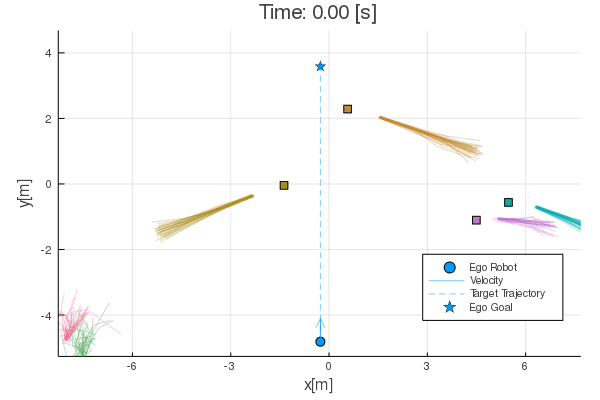

In [14]:
make_gif(result, dtplot=0.02, fps=50, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="7_data_extensive_search.gif")

In [15]:
save("7_data_extensive_search.jld2", "result", result)